In [57]:
from cgmbrush import *
from tempfile import TemporaryFile
import cProfile
import io
import pstats
from scipy.ndimage.filters import convolve
import scipy.signal as sig
import timeit

In [58]:
def my_convolve(a, b):
    """FFT convolve. TODO Edge behaviors may need testing."""
    halfwidth = int(b.shape[0] / 2)
    a2 = np.roll(np.roll(a, -halfwidth, axis=0), -halfwidth, axis=1)
    return np.fft.irfft2(np.fft.rfft2(a2) * np.fft.rfft2(b, a2.shape))

In [59]:
a = np.zeros((100, 100))
a[49][48] = 1
a[49][49] = 1
a[49][50] = 1
a[48][49] = 1
a[50][49] = 1

a_single_dot = np.zeros((30, 30))
a_single_dot[14][14] = 1

a_with_corner = np.zeros((30, 30))
a_with_corner[14][14] = 1
a_with_corner[14][15] = 1
a_with_corner[14][13] = 1
a_with_corner[15][14] = 1
a_with_corner[13][14] = 1
a_with_corner[1][0] = 1
a_with_corner[1][2] = 1
a_with_corner[1][1] = 1
a_with_corner[2][1] = 1
a_with_corner[0][1] = 1

b_even = np.zeros((10,10))
b_even[4][3] = 1
b_even[4][5] = 1
b_even[4][4] = 1
b_even[3][4] = 1
b_even[5][4] = 1

b_big = np.zeros((80,80))
b_big[39][39] = 1
b_big[40][39] = 1
b_big[38][39] = 1
b_big[39][40] = 1
b_big[39][38] = 1

b_odd = np.zeros((15,15))
b_odd[7][7] = 1
b_odd[7][8] = 1
b_odd[7][6] = 1
b_odd[8][7] = 1
b_odd[6][7] = 1

# Resolution 1 equivalent in cgmbrush
a_large = np.random.random((1024,1024))
b_random = np.random.random((20,20))

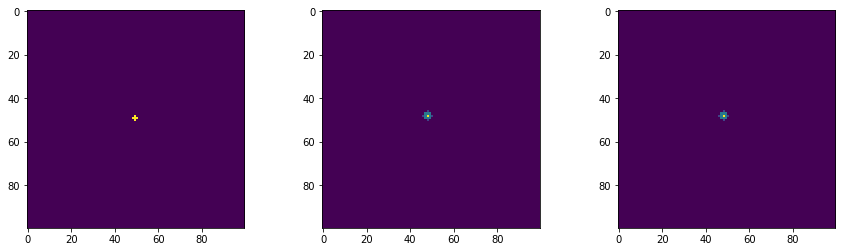

In [60]:
# Proof that my implementation is equivalent to what we did before for even sized filters
c8 = convolve(a, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # what we do today, but period instead of symmetric

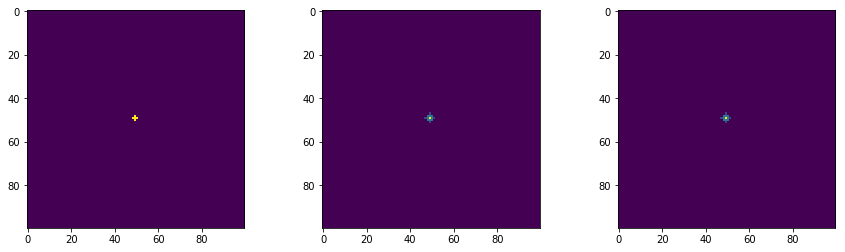

In [61]:
# Proof that my implementation is equivalent to what we did before for odd sized filters
c8 = convolve(a, b_odd, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_odd)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # what we do today, but period instead of symmetric

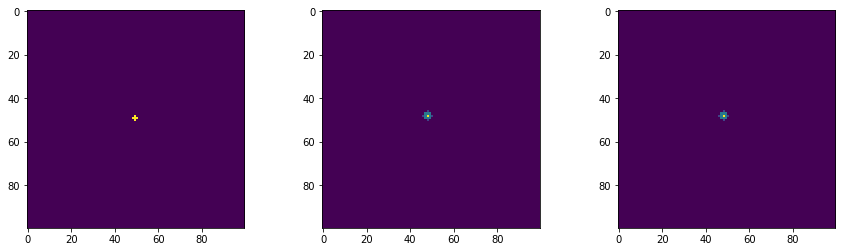

In [62]:
# Proof that my implementation is equivalent to what we did before for large masks
c8 = convolve(a, b_big, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_big)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # what we do today, but period instead of symmetric

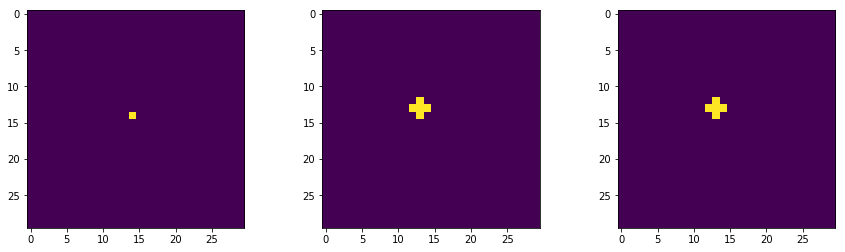

In [63]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_single_dot, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_single_dot, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_single_dot) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # what we do today, but period instead of symmetric

assert (not np.allclose(np.zeros((30,30)), c3)), "should be false"

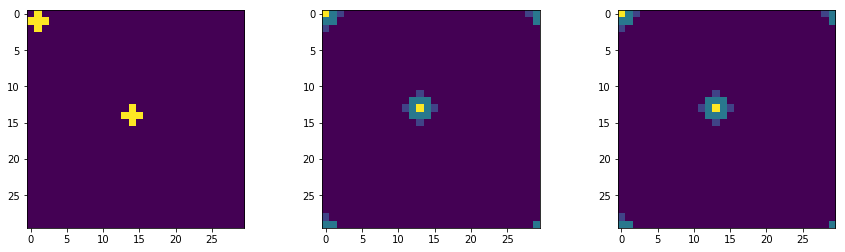

In [64]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_with_corner, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_with_corner, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_with_corner) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # what we do today, but period instead of symmetric

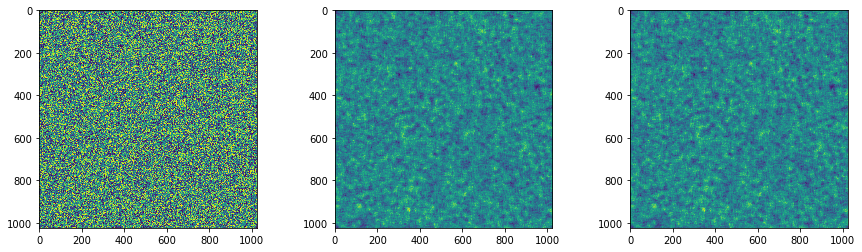

In [65]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_large, b_random, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_random)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # what we do today, but period instead of symmetric